# A Simple Harmonic Oscillator

A simple harmonic oscillator comes up often in many areas of physics. This ranges from simple spring-mass set-ups, to small displacements of pendulums, to vibrations in quantum field theory.

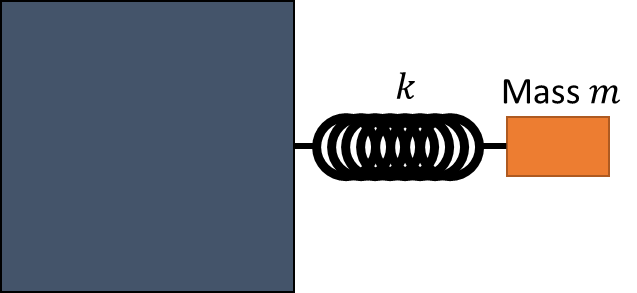

A harmonic oscillator is typically governed by a quadratic potential. Examples include elastic potential energy ($\frac{1}{2}kx^2$), capacitance charging energy ($\frac{1}{2}CV^2$) or inductance in magnetic fields ($\frac{1}{2}LI^2$). We can write the motion of a harmonic oscillator in terms of Newtonian forces, such that:

$$
F_\textrm{SHO} = ma = - kx
$$

We can see that the force $F_\textrm{SHO}$ (proportional to mass $m$ and acceleration $a=\frac{d^2x}{dt^2}$) is written as being proportional (to a factor $k$) to the displacement $x$ and directed in the opposite direction to the displacement. This force is known as the <u>restoring</u> force

However, this set-up only considers a very simple system. For typical harmonic oscillators, there are typically two additional terms contributing to the force: (1) a damping term that dissipates energy, and (2) a driving term that adds energy. 



## Damping Term

In real world oscillators, there is often some resistance to the motion of the oscillator that dissipates energy as heat. For example, this could be friction, air resistance, or electrical resistance. This term is generally proportional to velocity, and acts to oppose the force. This can be written as

$$
F_\mathrm{tot} = F_\mathrm{SHO} + F_\mathrm{damp}
$$

where $F_\mathrm{damp} = - cv = -c\frac{dx}{dt}$, $c$ is a positive constant. 



## Driving Term

Another feature of real world oscillators is the prescence of a driving term. This could be a periodic force on a system, such as shaking a pendulum set-up, or radio waves for a oscillating circuit. This term can take on any form, depending on the drive applied, but is generally taken to be a sinusoidal force.

For this simulation, we will not consider this term.

## Numerical Integration

The idea behind numerical integration is to take small steps in time ($\delta t$) and determine the path the object will follow. This is different from reality as time flows smoothly and continuously. As such, we can deduce that the smaller time steps we take, the closer we get to a continuous flow of time, and the more accurate the simulation (At the cost of computational power).

To do numerical integration, we must first understand (1) position $r$, (2) velocity $v$, and (3) acceleration $a$. In physics, velocity is defined as change in position over time $t$, and acceleration is change in velocity over time $t$. As simple way to express this is

$$
v \equiv \frac{dr}{dt} \approx \frac{r_f - r_i}{t} \\
a \equiv \frac{dv}{dt} \approx \frac{v_f - v_i}{t}
$$

The time differentials ($d/dt$) indicate a change in time with respect to a variable. We can see that it is essentially taking the difference between the final and inital values (subscript $f$ and $i$), and dividing by the time difference $t$.

We can use this equation to find the final velocity/position, given that we know the acceleration/velocity and the time taken. By choosing a small time step $\delta t$, we can find the position at the next instance in time:

$$
v = \frac{r_f - r_i}{\delta t} \\
r_f = r_i + v\cdot\delta t
$$

Likewise for velocity

$$
a = \frac{v_f - v_i}{\delta t} \\
v_f = v_i + a\cdot\delta t
$$

Thus, we can sequentially determine the velocity and position of an object step-by-step, given that we know the acceleration (proportional to force, $F=ma$) on the object. 

# Simulation




## Importing Libraries

First, we have to import the libraries required. We will need

1. `matplotlib.pyplot` for plotting our results
2. `numpy` for making the math

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Variables

Consider the variables we need. For a spring-mass system, we can consider three variables: 

1.   Mass of Oscillator $m$
2.   Spring Constant $k$
3.   Viscous Damping Coefficient $c$

And for a given oscillator, we can define initial conditions for the position, velocity. For this example, we will take initial velocity to be $0$, and consider only initial displacement.

For multiple oscillators, we should consider this set of variables again for each oscillator. For this example, we will consider just one oscillator.

In [ ]:
m = 10                  # Mass of oscillator
k = 2                   # Spring constant
c = 1                   # Viscous damping coefficient

x0 = 5                  # Initial position offset
v0 = 0                  # Initial velocity

For numerical methods, we also need to define a time step $\delta t$ that we will take at every iteration, as well as the total run time.

In [ ]:
timestep = 0.1
runtime = 100

For plotting later on, we also want something to keep track of the history of the motion of the oscillator. We will use a list, and append the position and velocity at every instant in time.

In [ ]:
pos_hist = [x0]
vel_hist = [v0]
time_hist = [0]

## Define the force

We can write a function that will apply the force for us. It should take in the inputs of a specific oscillator (mass, spring constant, viscous damping coefficient) and its current state (position and velocity), and return us the state at the next instant in time (position and velocity). It should also update the history of the oscillator.

In [ ]:
def ApplyForce(mass, springk, dampc, pos, vel):
    force = - springk*pos - dampc*vel                   # From the formula given above
    accel = force/mass                                  # From Newton's equation

    new_pos = pos + vel*timestep                        # From the equation for numerical integration
    new_vel = vel + accel*timestep

    pos_hist.append(new_pos)                            # Add the new position and velocity to the history
    vel_hist.append(new_vel)


## Running the simulation

We can now run the simulation. We will need to keep track of the current time, position and velocity of the oscillator. A neat way to do that is to simply consider the last element inside the history lists defined earlier.

The iteration itself will be done using a *while* loop

In [ ]:
while time_hist[-1] < runtime:                                          # While the time is less than the total runtime, 
    time_hist.append( time_hist[-1] + timestep )                        # Update the newest time step, by adding to the previous time step
    ApplyForce(m, k, c, pos_hist[-1], vel_hist[-1])                     # Run the fuction defined above

## Plotting the Results

We can see the motion of our oscillator by plotting the results. Consider the position/time and velocity/time graphs:

<function matplotlib.pyplot.show>

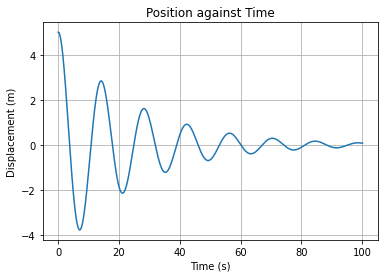

In [ ]:
# For position

plt.plot(time_hist, pos_hist)
plt.title("Position against Time")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.grid()

plt.show()

<function matplotlib.pyplot.show>

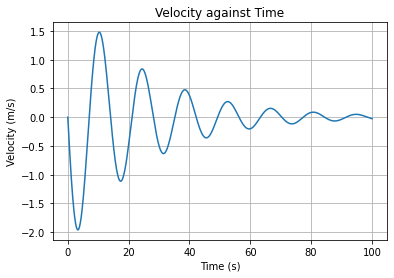

In [ ]:
# For velocity

plt.plot(time_hist, vel_hist)
plt.title("Velocity against Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.grid()

plt.show()

We can see that over time, the amplitude and maximum speed slowly decreases due to the dissipation term.

We can also consider the *phase-space diagram*. To plot this, we consider two variables that define the state of the system and plot them against each other. In this case, we can plot position against velocity.

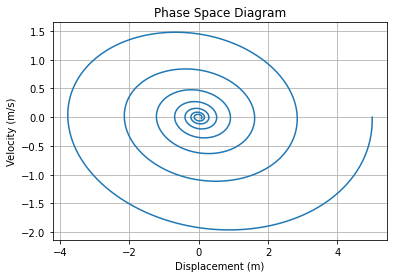

In [ ]:
plt.plot(pos_hist, vel_hist)
plt.title("Phase Space Diagram")
plt.ylabel("Velocity (m/s)")
plt.xlabel("Displacement (m)")
plt.grid()

plt.show()

We can see that over time, the line spirals inwards as the system loses energy.

# Possible Extensions

1. Determine the effects of the mass, spring constant, and viscous damping coefficient on the (1) Half-life of the oscillator, (2) Natural frequency of the oscillator
2. Add a sinusoidal driving term, and determine its effects on the oscillator
3. What if you have two oscillators attached together (e.g., by a weak spring)
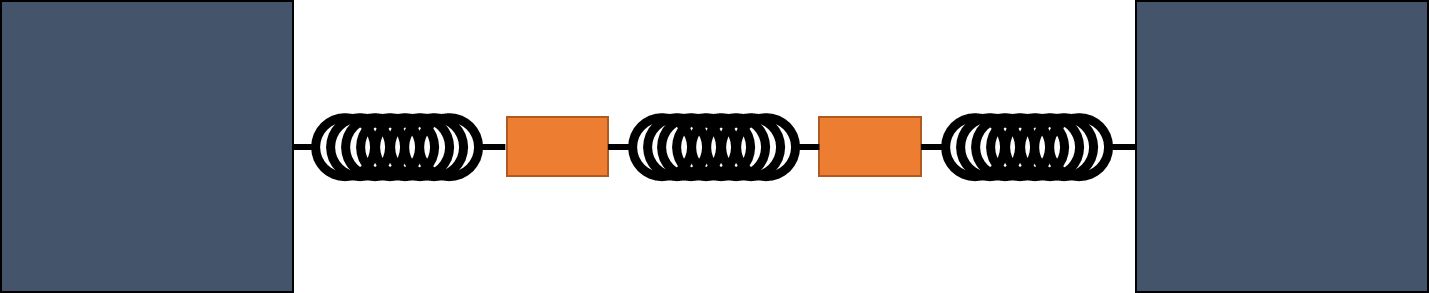
4. Double pendulum set-up
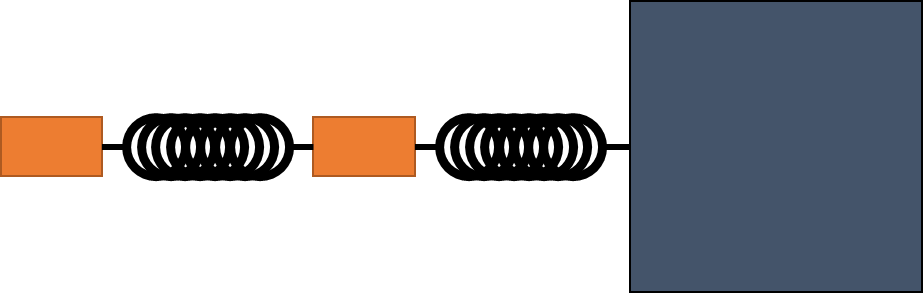
5. Adding more degrees of freedom (More dimensions)